# <font color='#2F4F4F'>AfterWork Data Science: Text Summarization with Python - Project</font>

## <font color='#2F4F4F'>Step 1. Business Understading </font>

### a) Specifying the Research Question

Build a text summarizer that creates a short and precise summary of a news article. 

### b) Defining the Metric for Success

A text summarizer that creates summaries news articles.

### c) Understanding the Context 

International Reuters is an international news organization that provides breaking news and information on the top stories, weather, business, entertainment, politics, and more. In April 2020, internationalreuters.com ranked second place among online global news sites in unique users across the world, according to NetRatings; with an increase of 10% over the previous year.

The news agency has recently launched a new version of its website and would like you to create a solution that will automate the process of text summarization as this process is currently a manual process.

### d) Recording the Experimental Design

* Business Understanding
* Data Importation
* Data Exploration
* Text Preprocessing 
* Sentence Tokenization
* Word Tokenization
* Weighted Frequency of Occurence
* Summarization


## <font color='#2F4F4F'>Step 2. Data Importation</font>

In [1]:
# Importing the required libraries
# ---
# 
import pandas as pd         # library for data manipulation
import seaborn as sns       # library for data visualisation 
import re                   # library to perform text preprocessing
import string               # library to work with strings
import nltk                 # library for natural language processing
import heapq                # library for queing that will be used for generating our summary
nltk.download('punkt')      # nltk package for sentence tokenization
nltk.download('stopwords')  # nltk package for stop words
 
# Setting column width setting to max for our dataframes
pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Loading and previewing the dataset
df = pd.read_csv('https://bit.ly/3hDN4vt')
df.head()

,Article,Heading,NewsType
0,"NAGPUR: Australia began their title defence with a six-wicket win against South Africa at the VCA Stadium in Nagpur. It was vice-captain Alex Blackwell and captain Meg Lanning who led the way to chase down 103 easily in the end, after they were reduced to 9 for 3 in the fourth over.South Africa had an excellent launch pad at 69 without loss in 12 overs after opting to bat. Then they fell into a crater courtesy rush of blood, indecision against spin and a number of misguided strokes to huff and puff to 102 for 6. As hard as they tried, defending it was never going to be easy against the masters of the big occasion who are gunning for their fourth successive title.Eventually, the batting meltdown played a big part in the result, as Lanning and Blackwell allayed fears with an unbroken 52-run fifth-wicket stand off just 38 balls to see Australia home with nine balls to spare.South Africa showed they were up for a fight as Dane van Niekerk did the early running by making 45 in a 72-run opening stand with Trisha Chetty, before Australia strangulated them.While Ellyse Perry hustled the batsmen with pace, Lauren Cheatle's canny variations resulted in South Africa's middle order having to manufacture strokes that didn't connect. Chetty's scratchy 34 eventually helped them cross the 100-run mark.Australia's thoughts of the chase being a walk in the park were firmly put on the backburner. Alyssa Healy walked across to flick, only to find her leg stump flattened to give the fired-up Shabnim Ismail an early sniff. Perry bottom-edged a cut to the wicketkeeper, while Ellyse Villani chopped on to leave Australia in tatters before they could reach double figures.Lanning's illness that kept her off the field for most parts of South Africa's innings meant she could come in either after 30 minutes or the fall of the fifth wicket. But the conclusion of Ismail's opening burst took with it the sting in their attack as Blackwell and Jess Jonassen added 44 for the fourth wicket. When Jonassen stepped out to be stumped, the game was back in the balance as Australia slipped to 53 for 4, needing 50 off 47 balls.Lanning struggled to run as she helped herself to three fours to bring the equation down to 23 off the last four overs. Once within striking distance, the feared white-ball striker in her surfaced as she hit Ismail for two fierce square cuts, to convert a tricky chase into a cruise.",Australia women record easy win over South Africa,sports
1,"Tokyo: Japan and Iran will start talks next week to negotiate a bilateral investment treaty, as Washington moves to ease sanctions against Tehran and Tokyo looks to step up its interests in the resource rich nation.Japanese and Iranian officials will meet in Tehran from Monday through to Wednesday to secure a deal, Chief Cabinet Secretary Yoshihide Suga said Friday, as other energy consumers also rush to explore Tehran´s commercial potential.""The aim of these negotiations is to protect the investment activities of Japanese companies,"" Suga told reporters at a regular briefing.When asked how resource-poor Japan would tap Iran´s energy potential, Suga said: ""Keeping those various factors in mind, Japan will take the necessary steps and not be later than other nations.""The move comes as Washington secures support in Congress for its nuclear deal with Iran, designed to limit its nuclear programme in exchange for the easing of US-led international sanctions.The historic deal was clinched in July after two years of negotiations to address Western concerns that Iran was developing a nuclear bomb -- a claim Iran denies.Japan hopes the lifting of sanctions will lead to increased auto exports to Iran and more Iranian energy imports, although Tokyo officials are bracing themselves for fierce international competition for market access, local media reported. Tokyo, which is heavily dependent on Middle Eastern oil, has maintained friendly relations with Tehran through its years of ostracis

## <font color='#2F4F4F'>Step 3. Data Exploration</font>

In [3]:
# check dataset shape
df.shape

(5, 3)

Our dataset has 5 records and 3 variables.

In [4]:
# preview variable datatypes
df.dtypes

Article     object
Heading     object
NewsType    object
dtype: object

Both variables have the data type object. This is fine for the text variable, however for the label, we will need to convert it to a numerical format. We will do this later.

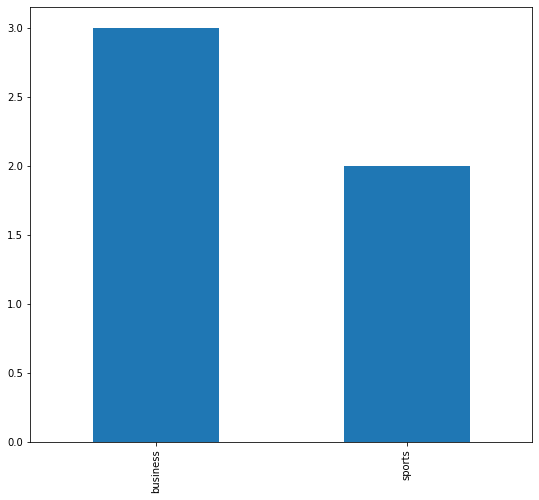

In [9]:
# plotting the distribution of label
# ---
#
df['NewsType'].value_counts().plot(kind="bar", figsize=(9, 8))
#plt.show()

In [10]:
# investigating the label distribution
df['NewsType'].value_counts()

business    3
sports      2
Name: NewsType, dtype: int64

In [11]:
# check for duplicates
df.duplicated().sum()

0

There are no duplicates

In [14]:
# check for missing values
#YOUR CODE GOES HERE
df.isnull().sum()

Article     0
Heading     0
NewsType    0
dtype: int64

No missing values found. 

In [15]:
# What values are in our label variable?
# ---
#
#YOUR CODE GOES HERE
df.NewsType.values

array(['sports', 'business', 'sports', 'business', 'business'],
      dtype=object)

## <font color='#2F4F4F'>Step 4. Text Preprocessing</font>

In [16]:
# The first step that will do is to prepare our text for further analysis.
# We will create custom function that will help us with this task.
# ---
#
#YOUR CODE GOES HERE
def text_preprocessing(text):
    
    # removing square brackets
    text = re.sub(r'\[[0-9]*\]', ' ', text)

    # removing extra spaces
    text = re.sub(r'\s+', ' ', text)

    return text

## <font color='#2F4F4F'>Step 5. Sentence Tokenization</font>

In [17]:
# We will now create a function that will perform sentence 
# tokenization i.e. breaking down the original text into sentences.
# ---
#  
#YOUR CODE GOES HERE
def tokenize_sentences(text):
    return nltk.sent_tokenize(text)

## <font color='#2F4F4F'>Step 6. Word Tokenization</font>

In [18]:
# We create a function to perform word tokenization 
# i.e. breaking down our sentences into words.
# ---
#
#YOUR CODE GOES HERE
def tokenize_words(formatted_text):
    return nltk.word_tokenize(formatted_text)

## <font color='#2F4F4F'>Step 7. Weighted Frequency of Occurrence</font>

In [19]:
# We create a function to determine word frequencies.
# This will be the first step towards determining 
# weighted frequencies as shown in the in the 
# weighted frequencies function in the next code cell.
# ---
#
#YOUR CODE GOES HERE
def word_frequencies(formatted_text):
    stop_words = nltk.corpus.stopwords.words('english')
    word_freq = dict()
    
    # We loop through the tokenized words to check if they are stop words
    # determining their frequencies.  
    # ---
    # 
    for word in tokenize_words(formatted_text):
        if word not in stop_words:
            if word not in word_freq.keys():
                word_freq[word] = 1
            else:
                word_freq[word] += 1
                
    return word_freq

In [20]:
# We then create a function to determine weighted frequencies of our words. 
# This will help us determine the frequency of each important word found 
# in the sentence. 
# ---
# To find the weighted frequency of each word, we divide the number of occurances 
# of all the words by the frequency of the most occurring word.
# ---
# 
#YOUR CODE GOES HERE
def weighted_frequencies(formatted_text):
    
    word_freq = word_frequencies(formatted_text)
    maximum_frequency = max(word_freq.values())
    
    weighted_freq = dict()
    
    for word in word_freq.keys():
        weighted_freq[word] = (word_freq[word]/maximum_frequency)
        
    return weighted_freq

In [21]:
# Upon calculating the weighted frequencies for all the words, 
# we now calculate the scores for each sentence by adding weighted 
# frequencies of the words that occur in that particular sentence.
# The following code will create a dictionary of sentences with scores.
# ---
# In the process, we will also calculate the score for only 
# sentences with less than 30 words.
# ---
#
#YOUR CODE GOES HERE
def sentence_scores(formatted_text):
    weighted_freq = weighted_frequencies(formatted_text)
    tokenized_sentences = tokenize_sentences(formatted_text)
    
    sentence_scores_table = dict()
    
    for sentence in tokenized_sentences:
        if sentence not in sentence_scores_table.keys():
            sentence_scores_table[sentence] = 0
        for word in nltk.word_tokenize(sentence):
            if word in weighted_freq.keys():
                if len(sentence.split(' ')) < 30:
                    sentence_scores_table[sentence] += weighted_freq[word]
                
    return sentence_scores_table

## <font color='#2F4F4F'>Step 8. Summarization</font>

In [23]:
# To summarize the text, we can take top N sentences with the highest scores. 
# The following code will execute the retrieve the top 5 sentences and print them.
# ---
#
#YOUR CODE GOES HERE
def summarize(text):

    # performing text processing
    formatted_text = text_preprocessing(text)

    # assigning scores to our sentences
    sentence_scores_dict = sentence_scores(formatted_text)
    
    # getting 5 sentences with highest scores
    summary_sentences = heapq.nlargest(5, sentence_scores_dict, key=sentence_scores_dict.get)

    # print("summary sentences", summary_sentences)
    
    # joining our sentences
    summary = " ".join(summary_sentences)
    
    # printing our summary
    print(summary)

### <font color='#2F4F4F'>Findings and Recommendations</font>

In [24]:
# Printing out our summaries 
# ---
# 
#YOUR CODE GOES HERE
for x in df['Article']:
  summarize(x)


Once within striking distance, the feared white-ball striker in her surfaced as she hit Ismail for two fierce square cuts, to convert a tricky chase into a cruise. Chetty's scratchy 34 eventually helped them cross the 100-run mark.Australia's thoughts of the chase being a walk in the park were firmly put on the backburner. But the conclusion of Ismail's opening burst took with it the sting in their attack as Blackwell and Jess Jonassen added 44 for the fourth wicket. Alyssa Healy walked across to flick, only to find her leg stump flattened to give the fired-up Shabnim Ismail an early sniff. Then they fell into a crater courtesy rush of blood, indecision against spin and a number of misguided strokes to huff and puff to 102 for 6.
There have also been no new Japanese investments in Iran since 1993, according to official data. Tokyo: Japan and Iran will start talks next week to negotiate a bilateral investment treaty, as Washington moves to ease sanctions against Tehran and Tokyo looks t

### <font color='#2F4F4F'>Challenging our Solution</font>

### a) Did we have the right question?

Yes, the question could be answered by text summarisation

### b) Did we have the right data?
Yes, the data was sufficient to perfrom summaristion steps

### c) What can be done to improve the solution?

Further analysis on the different News Types